# Importing Libraries and Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
import pylab as pl


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# file path
path = r'/Users/Evan/Desktop/MLB Team Stats Project'

In [3]:
# data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'stl_hr_2.csv'))

In [4]:
# Data check
df.head()

,Date,HR
0,2023-03-30,2
1,2023-03-31,0
2,2023-04-01,0
3,2023-04-02,4
4,2023-04-03,0


In [5]:
df_2 = df.reset_index()

In [6]:
df_2.head()

,index,Date,HR
0,0,2023-03-30,2
1,1,2023-03-31,0
2,2,2023-04-01,0
3,3,2023-04-02,4
4,4,2023-04-03,0


In [7]:
from datetime import datetime

df_2['datetime'] = pd.to_datetime(df_2['Date']) 
df_2['datetime'].asfreq('D')

1970-01-01   NaT
Freq: D, Name: datetime, dtype: datetime64[ns]

In [9]:
df_2 = df_2.drop(columns = 'Date')

In [10]:
df_2 = df_2.drop(columns = 'index')

In [13]:
df_2.head()

,HR
datetime,
2023-03-30,2
2023-03-31,0
2023-04-01,0
2023-04-02,4
2023-04-03,0


In [12]:
df_2= df_2.set_index('datetime')

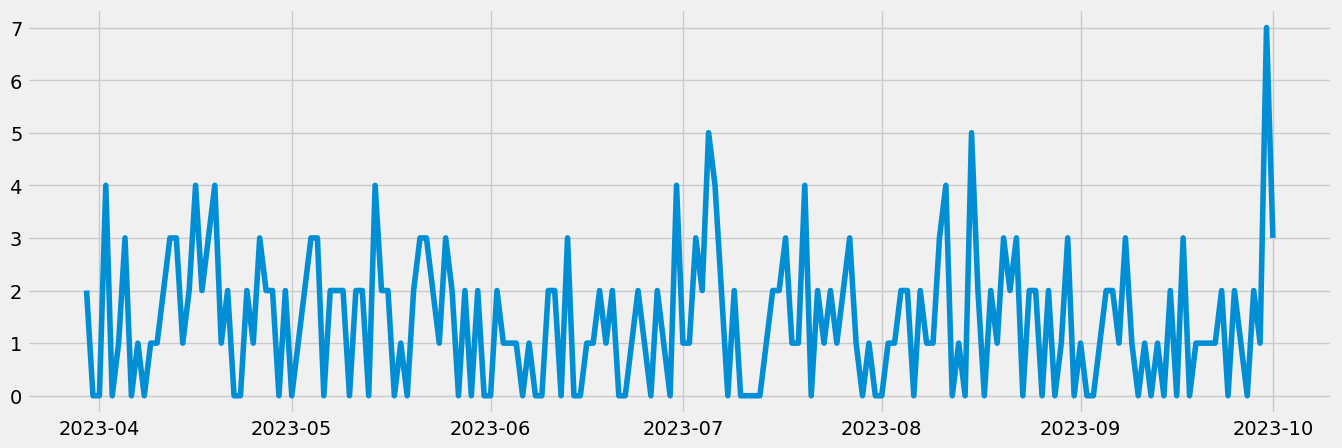

In [14]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

In [15]:
decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

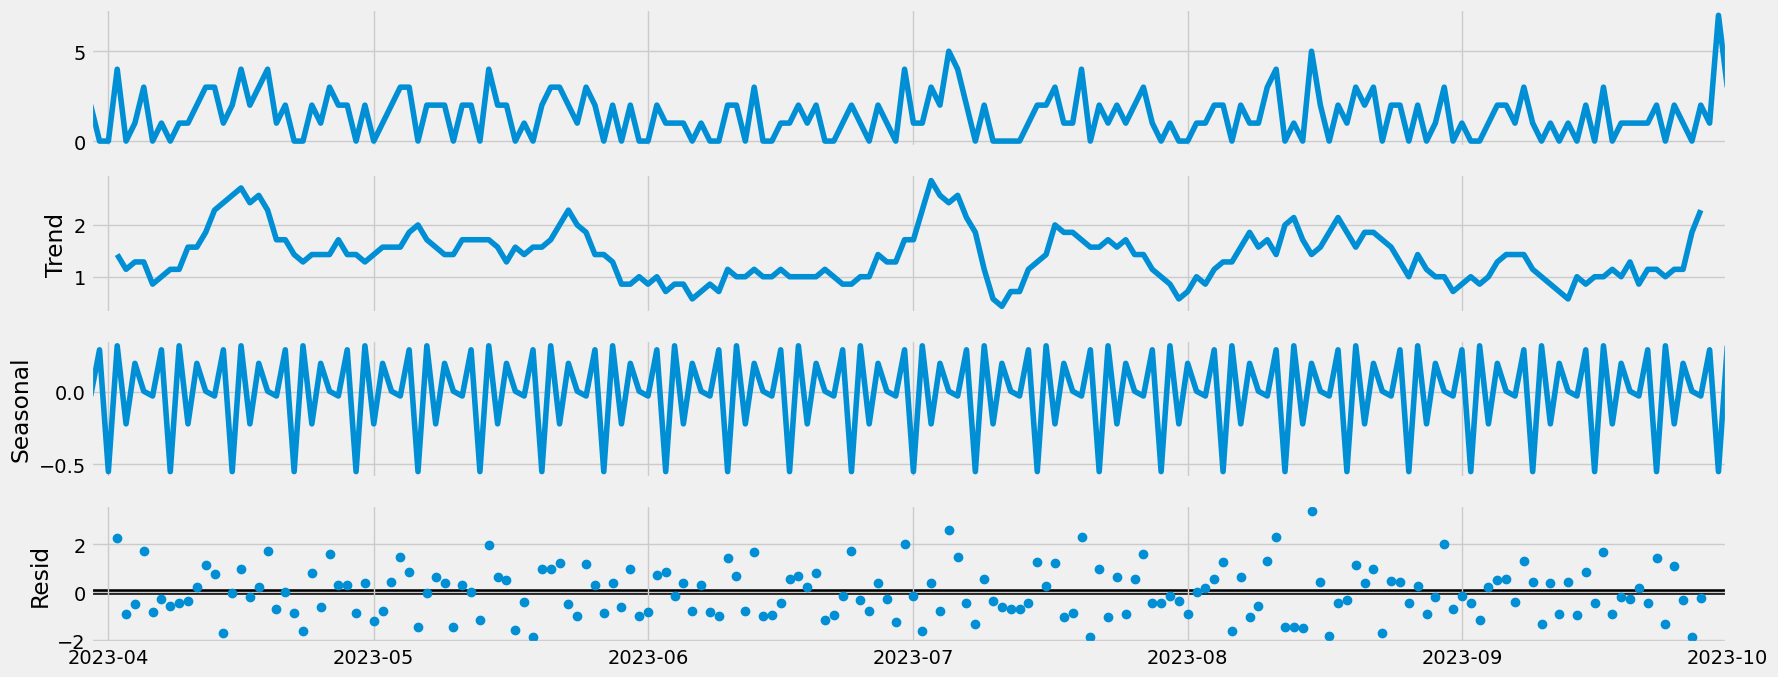

In [17]:
decomposition.plot()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['HR'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.327991e+01
p-value                        7.729793e-25
Number of Lags Used            0.000000e+00
Number of Observations Used    1.850000e+02
Critical Value (1%)           -3.466201e+00
Critical Value (5%)           -2.877293e+00
Critical Value (10%)          -2.575168e+00
dtype: float64


In [21]:
data_diff = df_2 - df_2.shift(1)

In [22]:
data_diff.dropna(inplace = True)

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.913726e+00
p-value                        1.194156e-09
Number of Lags Used            9.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


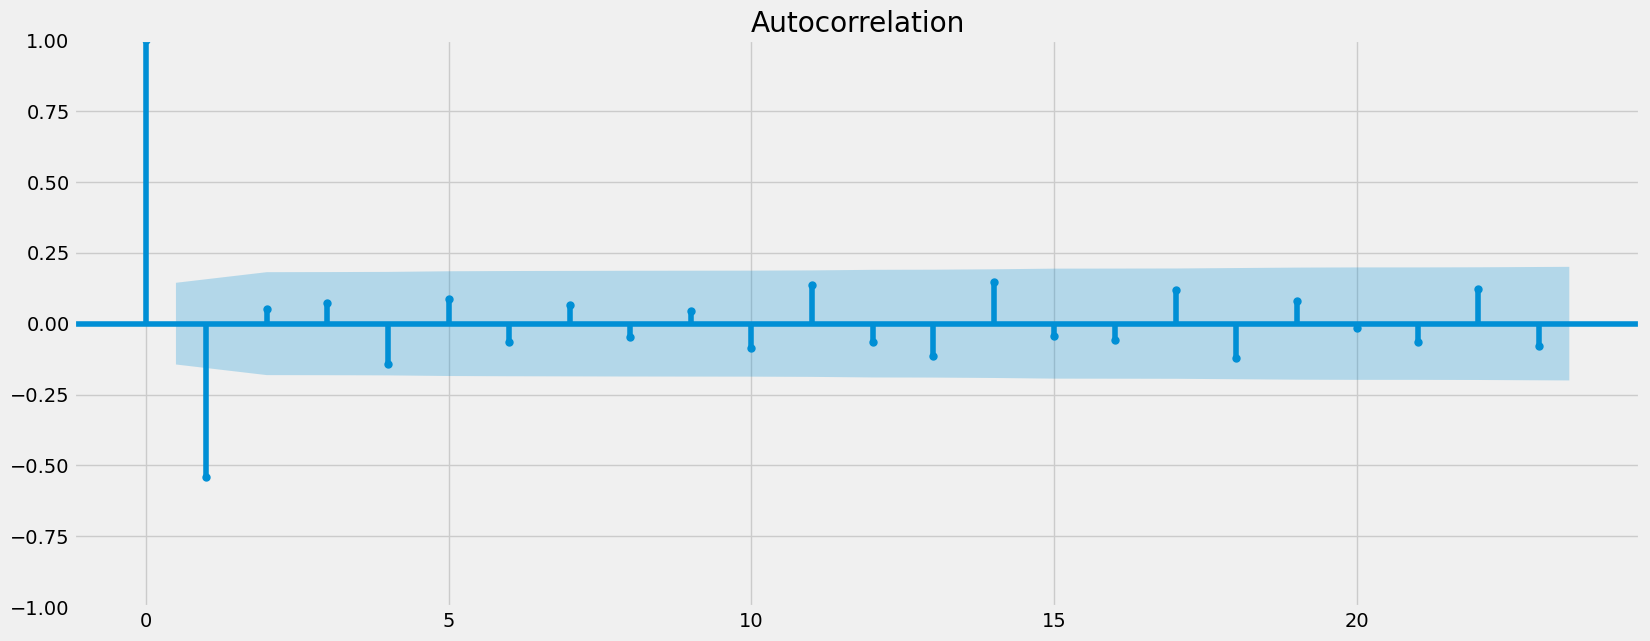

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()